<a href="https://colab.research.google.com/github/roy07623/Aplikasi-E-Rapot-Pelita/blob/main/SMK_Pelita_Al_Quran_LKS_JATENG_AI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOPIK: DATA PREPARATION FOR FORECASTING (A1)**


1. Identifikasi dataset yang diberikan sebagai berikut:
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

2. jelaskan kategori atau tipe data untuk masing - masing atribut atau variable
3. baca dataset tersebut dengan Python pandas dan berikan dokumentasi sederhana mengenai cara kerja



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
               model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0               GT86  2016  16000       Manual  ...    Petrol  265  36.2         2.0
1               GT86  2017  15995       Manual  ...    P

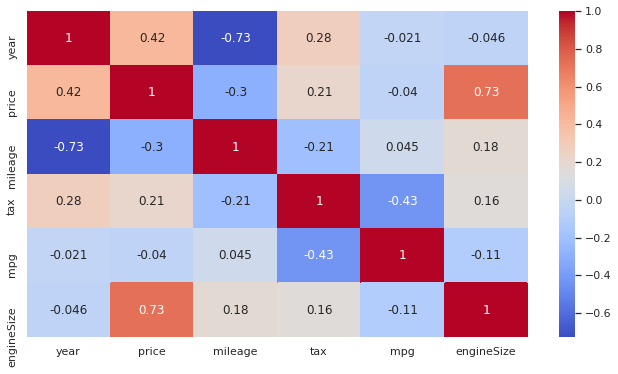

In [ ]:
# Jawaban soal nomor 1.(A1)
# Lingkungan Python 3 ini dilengkapi dengan banyak pustaka analitik bermanfaat yang diinstal
# Hal ini didefinisikan oleh gambar Docker kaggle / python: https://github.com/kaggle/docker-python
# Misalnya, inilah beberapa paket bermanfaat untuk dimuat

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# File data input tersedia dalam read-only ".. Direktori /input/"
# Misalnya, menjalankan ini (dengan mengklik jalankan atau tekan Shift+Enter) akan mencantumkan semua file di bawah direktori input

# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

# Anda dapat menulis hingga 20GB ke direktori saat ini (/kaggle/working/) yang dipertahankan sebagai output saat Anda membuat versi menggunakan "Save &amp; Run All" 
# Anda juga dapat menulis file sementara ke /content/drive/, tetapi tidak akan disimpan di luar sesi saat ini

# Import Library Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Jawaban soal nomor 2.(A1)
# disini saya akan menjelaskan tipe data masing-masing tipe data yang ada dalam kolom dataset LKS Mercedes/toyota.csv meliputi, model: string, year: int64, price: int64, transsmision: string, mileage: int64, fueltype: string, tax: int64, mpg: float64, engineSize: float64 dan kseimpulanya adalah ada tipe data float(2), int64(4), dan string(3) 
# Load Data
toyota = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota.csv')
toyota.head() # berfungsi untuk menampilkan data yang ada dalam dataset

# jawaban soal nomor 3.(A1)
toyota.isnull().sum() # akan memberikan jumlah kolom-nilai yang hilang.
toyota.info() # berfungsi untuk mengetahui semua data yang ada dalam suatu dataset
toyota.describe() # berfungsi untuk menampilkan/membaca nilai suatu data
 
# Mengubah suatu tipe data ke tipe data yang lain
toyota["model"] = toyota["model"].astype(str)
toyota["transmission"] = toyota["transmission"].astype(str)
toyota["fuelType"] = toyota["fuelType"].astype(str)
print(toyota)

# Normalisasi Data Menggunakan Z-Score
# Metode ketiga adalah Z-score atau disebut juga standard score. Dengan formula ini, masing-masing nilai pada fitur dikurangi dengan miu (µ) yang merupakan nilai rata-rata fitur, kemudian dibagi dengan sigma (σ) yang merupakan standar deviasi.
toyota["price"] = (toyota["price"] - toyota["price"].mean()) / toyota["price"].std()

toyota.describe(include='O') # describe dengan menampilkan include 0

cat_columns = ['model', 'transmission', 'fuelType'] # cat_columns akan menampilkan variabel ['model', 'transmission', 'fuelType']
num_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'] # num_columns akan menampilkan variabel ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'] 
num_columns_no_label = ['year', 'mileage', 'tax', 'mpg', 'engineSize'] # num_columns_no_label akan menampilkan variabel ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# visualisasi menggunakan scatter plot matrix
plt.figure(figsize=(10,6)) 
sns.heatmap(toyota.corr(), annot=True, cmap='coolwarm')

X=toyota.drop(['price'], axis=1)
Y=toyota['price']

toyota2 = pd.get_dummies(toyota, columns=cat_columns)
toyota2.head() # sudah saya jelaskan diatas
toyota2.info()  # sudah saya jelaskan diatas

# Normalisasi Data Menggunakan Z-Score
toyota2["price"] = (toyota2["price"] - toyota2["price"].mean()) / toyota2["price"].std()

# MEMISAHKAN ANTARA VARIABEL X DAN Y MENGGUNAKAN SKLEARN TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train[num_columns_no_label])
x_test= scaler.transform(x_test[num_columns_no_label])

# menghapus nilai yang mengandung missing value di colom price
X=toyota2.drop(['price'], axis=1)
Y=toyota2['price']

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pemiihan model menggunakan LinearRegression Dan DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Running menggunakan model diatas
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# Memanggil accuracy variabel dari data train dan test  menggunakan fungsi lin_model.score
print('Train Accuracy: %f' % lin_model.score(x_train, y_train))
print('Test Accuracy: %f' % lin_model.score(x_test, y_test))

# **TOPIK: DATA PREPARATION FOR CLUSTERING (A2)**


1. Identifikasi dataset yang diberikan sebagai berikut:
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

2. jelaskan kategori atau tipe data untuk masing - masing atribut atau variable
3. baca dataset tersebut dengan Python pandas dan berikan dokumentasi sederhana mengenai cara kerja





      CustomerID  Gender  Age  AnnualIncome(k$)  SpendingScore(1-100)
0             1    Male   19                15                    39
1             2    Male   21                15                    81
2             3  Female   20                16                     6
3             4  Female   23                16                    77
4             5  Female   31                17                    40
..          ...     ...  ...               ...                   ...
195         196  Female   35               120                    79
196         197  Female   45               126                    28
197         198    Male   32               126                    74
198         199    Male   32               137                    18
199         200    Male   30               137                    83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count

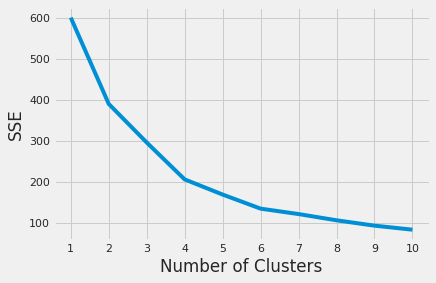

In [ ]:
# Jawaban soal nomor 1.(A2)
# Lingkungan Python 3 ini dilengkapi dengan banyak pustaka analitik bermanfaat yang diinstal
# Hal ini didefinisikan oleh gambar Docker kaggle / python: https://github.com/kaggle/docker-python
# Misalnya, inilah beberapa paket bermanfaat untuk dimuat

# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style='ticks')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# File data input tersedia dalam read-only ".. Direktori /input/"
# Misalnya, menjalankan ini (dengan mengklik jalankan atau tekan Shift+Enter) akan mencantumkan semua file di bawah direktori input

# Anda dapat menulis hingga 20GB ke direktori saat ini (/kaggle/working/) yang dipertahankan sebagai output saat Anda membuat versi menggunakan "Save &amp; Run All" 
# Anda juga dapat menulis file sementara ke /content/drive/, tetapi tidak akan disimpan di luar sesi saat ini

# Jawaban soal nomor 2.(A2)
# disini saya akan menjelaskan tipe data masing-masing tipe data yang ada dalam kolom dataset LKS Mall Customer Segmentation Data/Mall_Customers.csv meliputi, (CustomerID: int64, Gender: string, Age: int64, AnnualIncome(k$): int64, SpendingScore: int64)

# Load Data (LKS Mall Customer Segmentation Data/Mall_Customers.csv)
mall_customers = pd.read_csv('/content/drive/My Drive/LKS Mall Customer Segmentation Data/Mall_Customers.csv')
mall_customers.head() # berfungsi untuk menampilkan data yang ada dalam dataset

# jawaban soal nomor 3.(A2)
mall_customers.columns = mall_customers.columns.str.replace(' ', '') # berfungsi untuk mer-replace colom tipe data string yang ada dalam mall_customers
print("\n\n", mall_customers)  # berfungsi untuk menampilkan data yang ada dalam mall_customers
mall_customers.info() # berfungsi untuk menampilkan info yang ada dalam mall_customers

# Mengubah suatu tipe data ke tipe data yang lain (Gender yang tadinya Object saya Ubah ke String)
mall_customers["Gender"] = mall_customers["Gender"].astype(str)
print(mall_customers)

x = mall_customers.groupby('Gender')['AnnualIncome(k$)'].mean()
print(x)

# Mari kita standarkan variabel sebelum menggunakan algoritma apapun pada mereka.
scaler = StandardScaler()
features = mall_customers.iloc[:200,2:5]
scaled_features = scaler.fit_transform(features)

# Disini saya menggunakan metode K-Means
kmeans_kwargs = {
                "init": "random",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42,
                 }

sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# **TOPIK: DATA PREPARATION FOR CLASSIFICATION (A3)**


1. Identifikasi dataset yang diberikan sebagai berikut:
https://www.kaggle.com/primaryobjects/voicegender

2. jelaskan kategori atau tipe data untuk masing - masing atribut atau variable
3. baca dataset tersebut dengan Python pandas dan berikan dokumentasi sederhana mengenai cara kerja



Mounted at /content/drive/


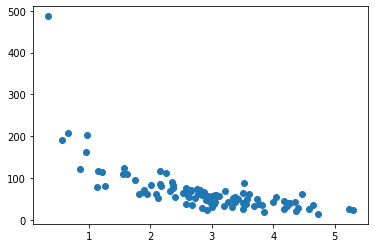

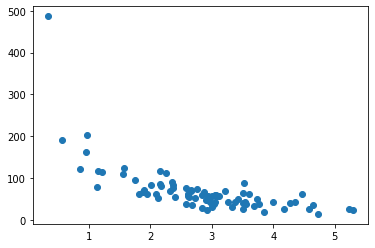

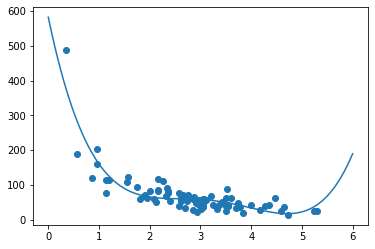

In [ ]:
#Jawaban soal (A3)
#1 Database ini dibuat untuk mengidentifikasi suara sebagai pria atau wanita, berdasarkan properti akustik suara dan ucapan. Dataset terdiri dari 3.168 sampel suara yang direkam, dikumpulkan dari pembicara pria dan wanita. Sampel suara diproses sebelumnya dengan analisis akustik dalam R menggunakan paket gelombang laut dan tuneR, dengan rentang frekuensi yang dianalisis 0hz-280hz (rentang vokal manusia).
#2 meanfreq: Float,	sd: Float, Q25,	Q75,	IQR,	skew,	kurt,	sp.ent,	sfm	mode,	centroid,	meanfun,	minfun,	maxfun,	meandom,	mindom,	maxdom,	dfrange,	modindx: Float,	median: Float, label: String.	
#3
#CONNECT GOOGLE DRIVE
from google.colab import drive
# Import Library and Load File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing as per
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/My Drive/Dataset Voice/voice.csv")

#Hasil pembacaan dataset
df.head() 

#Melakukan seleksi data
df[10:15]

#Melakukan seleksi sesuai dengan posisi row dan column
df.iloc[:,0:13] 

#Mengetahui type data
df.dtypes  

#Cek nilai data
df.describe() 


import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]
plt.scatter(train_x, train_y)
plt.show()

import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

# **TOPIK: DATA PREPROCESSING FOR FORECASTING (B1)**

1. Berdasarkan data A1 yang sudah anda baca, jelaskan tujuan dari forecasting apa yang ingin dilakukan?

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas forecasting (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll), tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
# 1). Forecasting yang saya lakukan adalah bertujuan untuk meramalkan atau memprediksi dataset A1 yang tadinya data preparation dan sudah saya ubah menjadi data forecasting agar nantinya dalam melakukan preprocessing data dapat mendapatkan hasil yang akurat.

# Load Data
toyota = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota.csv')
toyota.head() # berfungsi untuk menampilkan data yang ada dalam dataset

# 2). mengatasi missing value dengan kode dibawah ini
import pandas as pd
missing_values = ["n/a", "na", "--", "?"]
toyota = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota.csv')

# 3). Mengubah suatu tipe data ke tipe data yang lain (model, transmission, dan fuelType yang tadinya Object saya Ubah ke String)
toyota["model"] = toyota["model"].astype(str)
toyota["transmission"] = toyota["transmission"].astype(str)
toyota["fuelType"] = toyota["fuelType"].astype(str)
print(toyota)

# 4). Normalisasi Data Menggunakan Z-Score
# Metode ketiga adalah Z-score atau disebut juga standard score. Dengan formula ini, masing-masing nilai pada fitur dikurangi dengan miu (µ) yang merupakan nilai rata-rata fitur, kemudian dibagi dengan sigma (σ) yang merupakan standar deviasi.
toyota["price"] = (toyota["price"] - toyota["price"].mean()) / toyota["price"].std()

# 5). MEMISAHKAN ANTARA VARIABEL X DAN Y MENGGUNAKAN SKLEARN TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train[num_columns_no_label])
x_test= scaler.transform(x_test[num_columns_no_label])

# menghapus nilai yang masih mengandung missing value di colom price
X=toyota2.drop(['price'], axis=1)
Y=toyota2['price']

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pemiihan model menggunakan LinearRegression Dan DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Running menggunakan model diatas
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# Memanggil accuracy variabel dari data train dan test  menggunakan fungsi lin_model.score
print('Train Accuracy: %f' % lin_model.score(x_train, y_train))
print('Test Accuracy: %f' % lin_model.score(x_test, y_test))

               model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0               GT86  2016  16000       Manual  ...    Petrol  265  36.2         2.0
1               GT86  2017  15995       Manual  ...    Petrol  145  36.2         2.0
2               GT86  2015  13998       Manual  ...    Petrol  265  36.2         2.0
3               GT86  2017  18998       Manual  ...    Petrol  150  36.2         2.0
4               GT86  2017  17498       Manual  ...    Petrol  145  36.2         2.0
...              ...   ...    ...          ...  ...       ...  ...   ...         ...
6733              IQ  2011   5500    Automatic  ...    Petrol   20  58.9         1.0
6734   Urban Cruiser  2011   4985       Manual  ...    Petrol  125  50.4         1.3
6735   Urban Cruiser  2012   4995       Manual  ...    Diesel  125  57.6         1.4
6736   Urban Cruiser  2011   3995       Manual  ...    Petrol  125  50.4         1.3
6737   Urban Cruiser  2011   4495       Manual  ...    Petrol  12

# **TOPIK: DATA PREPROCESSING FOR CLUSTERING (B2)**

1. Berdasarkan data A2 yang sudah anda baca, jelaskan tujuan dari forecasting apa yang ingin dilakukan?

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas clustering (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


In [ ]:
# 1). Forecasting yang saya lakukan adalah bertujuan untuk meramalkan atau memprediksi dataset A2 yang tadinya data preparation dan sudah saya ubah menjadi data Clustering agar nantinya dalam melakukan preprocessing data dapat mendapatkan hasil yang akurat dan sesuai dataset yang sudah diolah saya.

# Load Data (LKS Mall Customer Segmentation Data/Mall_Customers.csv)
mall_customers = pd.read_csv('/content/drive/My Drive/LKS Mall Customer Segmentation Data/Mall_Customers.csv')
mall_customers.head() # berfungsi untuk menampilkan data yang ada dalam dataset

# 2). Mengatasi Missin Value 
import pandas as pd
missing_values = ["n/a", "na", "--", "?"]
mall_customers = pd.read_csv('/content/drive/My Drive/LKS Mall Customer Segmentation Data/Mall_Customers.csv')

# 3). # Mengubah suatu tipe data ke tipe data yang lain (Gender yang tadinya Object saya Ubah ke String)
mall_customers["Gender"] = mall_customers["Gender"].astype(str)
print(mall_customers)

# 4). Normalisasi Data Menggunakan Z-Score
# Metode ketiga adalah Z-score atau disebut juga standard score. Dengan formula ini, masing-masing nilai pada fitur dikurangi dengan miu (µ) yang merupakan nilai rata-rata fitur, kemudian dibagi dengan sigma (σ) yang merupakan standar deviasi.
# mall_customers["Annualncome(k$)"] = (mall_customers["Annualncome(k$)"] - mall_customers["Annualncome(k$)"].mean()) / mall_customers["AnnualIncome(k$)"].std()

# 5). MEMISAHKAN ANTARA VARIABEL X DAN Y MENGGUNAKAN SKLEARN TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train[num_columns_no_label])
x_test= scaler.transform(x_test[num_columns_no_label])

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pemiihan model menggunakan LinearRegression Dan DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Running menggunakan model diatas
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# Memanggil accuracy variabel dari data train dan test  menggunakan fungsi lin_model.score
print('Train Accuracy: %f' % lin_model.score(x_train, y_train))
print('Test Accuracy: %f' % lin_model.score(x_test, y_test))

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Train Accuracy: 0.928142
Test Accuracy: 0.926525


# **TOPIK: DATA PREPROCESSING FOR CLASSIFICATION (B3)**

1. Berdasarkan data A3 yang sudah anda baca, jelaskan tujuan dari forecasting apa yang ingin dilakukan?

2. jelaskan bagaimana cara mengatasi missing value, tuliskan dalam Python

3. ubahlah format yang sesuai dengan tugas classification (misalkan nilai harus bernilai integer, dan kalimat harus bernilai string, dll) atau tugas lainnya.. tuliskan dalam Python

4. apakah perlu ada normalisasi pada dataset? jika iya, metode normalisasi apa yang anda gunakan? jelaskan pilihan anda, tuliskan dalam Python

5. pisahkan dataset menjadi data latih dan data uji menggunakan Python sklearn train test split yang sebelumnya perlu dipisahkan terlebih dahulu variable X merupakan independent variable dan variable y merupakan dependent variable, tuliskan dalam Python


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

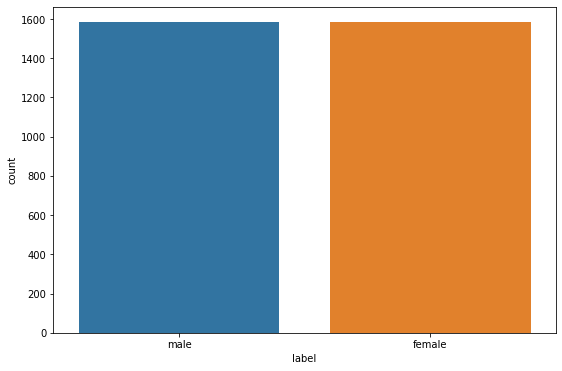

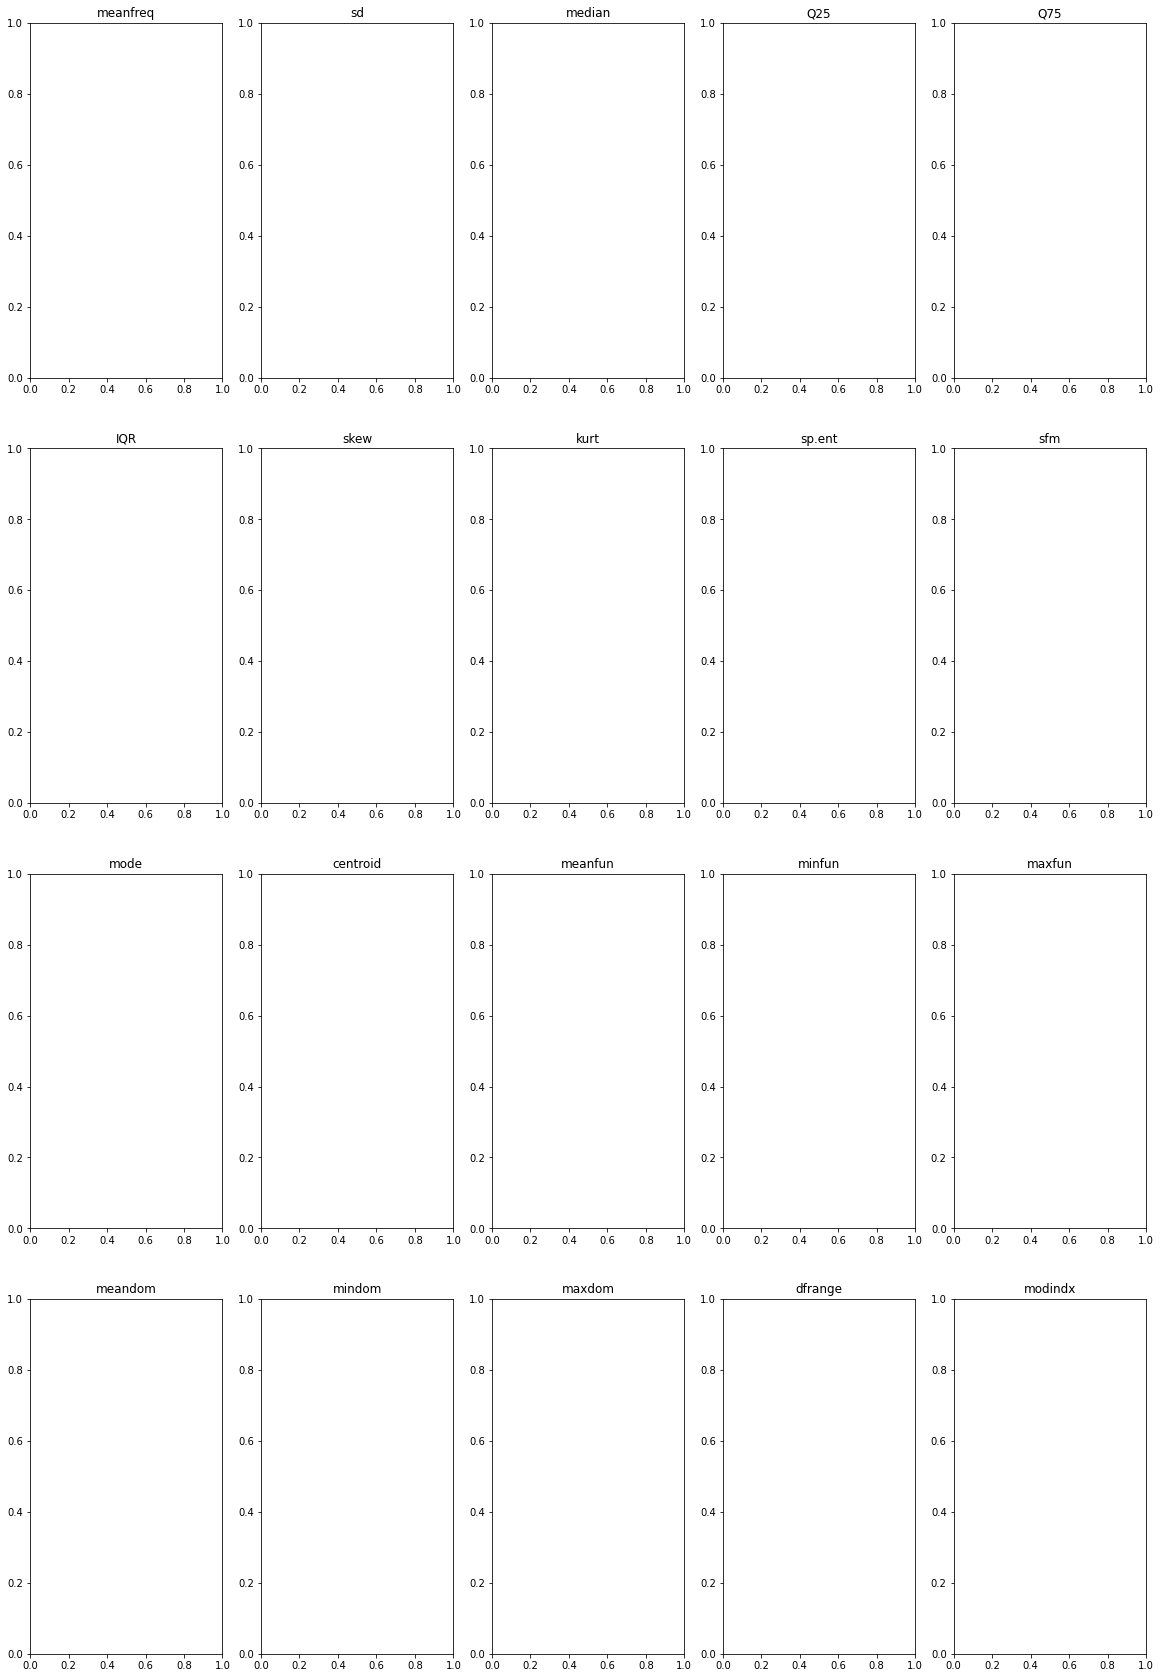

In [ ]:
#MASUKAN JAWABAN B3 disini (jika jawaban merupakan isian, gunakan comment Python #
#1 perkiraan atau forecasting terlihat pada saat pengambilan keputusan. Keputusan yang baik adalah keputusan yang didasarkan atas pertimbangan apa yang akan terjadi pada waktu keputusan itu dilaksanakan.
# perkiraan atau forecasting memiliki tujuan sebagai berikut:
  #a. untuk mengidentifikasi suara sebagai pria atau wanita, berdasarkan properti akustik suara dan ucapan.
  #b. Perkiraan diperlukan karena adanya dua suara, diantaranya ada suara pria dan wanita.
  #c. Dataset terdiri dari 3.168 sampel suara yang direkam,n wan dikumpulkan dari pembicara pria dan wanita. Sampel suara diproses sebelumnya dengan analisis akustik dalam R menggunakan paket gelombang laut dan tuneR, dengan rentang frekuensi yang dianalisis 0hz-280hz (rentang vokal manusia).
#2
df.head() #Hasil pembacaan dataset

# Untuk mengetahui data tersebut
df.info() 

# Cetak statistik data
df.describe().T 

# Mencetak hitungan nilai yang hilang w.r.t setiap fitur dalam full_df
df.isna().sum()                    

# Analisis variabel target
plt.figure(figsize=(9,6))
sns.countplot(x='label', data=df, order=["male", "female"] )

# Mencetak jumlah kelas yang berbeda di 'label'
df['label'].value_counts()       

plt.subplots(4,5,figsize=(20,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'red', label='female')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'brown', label='male')

#3 Tugas clustering 
import numpy as np
from sklearn import preprocessing
label_kategori = ['meanfreq',	'sd',	'median',	'Q25',	'Q75',	'IQR',	'skew',	'kurt',	'sp.ent',	'sfm	mode',	'centroid',	'meanfun',	'minfun',	'maxfun',	'meandom	mindom',	'maxdom',	'dfrange',	'modindx',	'label']
encoder = preprocessing.LabelEncoder()
encoder.fit(label_kategori)

print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '>', i)

#4 Normalisasi data? Iya perlu. Dan yang saya gunakan yaitu normalisasi data Z-score atau disebut juga standard score. Dengan formula ini, masing-masing nilai pada fitur dikurangi dengan miu yang merupakan nilai rata-rata fitur, kemudian dibagi dengan sigma yang merupakan standar deviasi.
df["sd"] = (df["sd"] - df["sd"].mean()) / df["sd"].std()
df["meanfreq"] = (df["meanfreq"] - df["meanfreq"].mean()) / df["meanfreq"].std()
df.head()

#5 Memisahkan training dengan testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test

# Mencetak data X_test
print(X_test) 

# Mencetak data y_train
print(y_test) 

# **TOPIK: DATA DEPENDENCY VISUALIZATION (C1)**

1. pada dataset A1 dan B1, identifikasi korelasi antara feature (independent variable) dan dependent variable dengan matrix korelasi, tuliskan dalam Python
2. pada no.1, bagian mana yang memiiki korelasi yang kuat, jelaskan alasan nya
3. gambarkan visualisasi dari feature
4. gambarkan visualisasi dari class label
5. gambarkan visualisasi dari atribut
6. gambarkan visualisasi dari aliran data

(5390, 8) (5390,)
(1348, 8) (1348,)


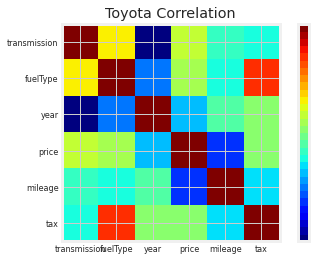

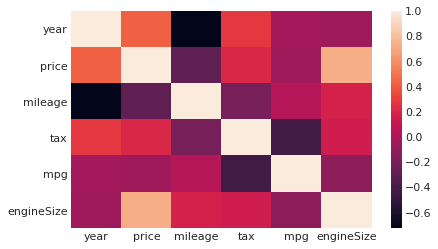

In [ ]:
# 1). mengidentifikasi dataset A1 dan B1 dan dikorelasikan antara feature (independent variable) dan dependent variable dengan matrix korelasi.

# Load Data dan Import Library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
toyota = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota.csv')

# Memisahkan toyota menjadi data dan label
data = toyota.drop('model',axis=1)
label = toyota['model']

# Memisahkan toyota menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Print toyota.shape untuk mengetahui bentuk dataframe
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# 2). Correlasi Matrix  terkuat adalah data x_train dengan nilai 5390

# Jawaban dari soal nomor 3 sampai 6 ada di kode bawah ini:
 # correlation matrix 1
def correlation_matrix(toyota):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(toyota.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Toyota Correlation') # judul
    labels=['model', 'transmission', 'fuelType','year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'] # visualisasi dari class label
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[])
    plt.show()

correlation_matrix(toyota)

# correlation matrix 2
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = toyota.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# **TOPIK: DATA FORECASTING (D1)**

1. Berdasarkan data A1, tentukan feature yang akan digunakan
2. Buatlah rencana plan forecasting
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk forecasting?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk forecasting
7. pilih algoritma forecasting yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari forecasting
11. analisa akurasi dari forecasting
12. analisa f-measure dengan sklearn

In [ ]:
# 1). saya akan menggunakan important features (D1)
# 2). Disini saya akan membuat rencana untuk dataset forecasting saya bisa memiliki suatu data ataupun nilai yang akurat dan rencana semua itu akan saya praktekkan menggunakan kode python dibawah ini
# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Jawaban soal nomor 3
# Next, we'll load the train and test dataset, which is in the "../input/" directory
train = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota.csv') # the train dataset is now a Pandas DataFrame
test = pd.read_csv('/content/drive/My Drive/Dataset LKS Mercedes/toyota_test.csv') # the test dataset is now a Pandas DataFrame

# Let's see what's in the trainings data - Jupyter notebooks print the result of the last thing you do
train.head()

# Press shift+enter to execute this cell

from sklearn.model_selection import train_test_split

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train[num_columns_no_label])
x_test= scaler.transform(x_test[num_columns_no_label])

# menghapus nilai yang mengandung missing value di colom price
X=toyota2.drop(['price'], axis=1)
Y=toyota2['price']

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pemiihan model menggunakan LinearRegression Dan DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Running menggunakan model diatas
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# Memanggil accuracy variabel dari data train dan test  menggunakan fungsi lin_model.score
print('Train Accuracy: %f' % lin_model.score(x_train, y_train))
print('Test Accuracy: %f' % lin_model.score(x_test, y_test))

Train Accuracy: 0.928142
Test Accuracy: 0.926525


# **TOPIK: DATA CLUSTERING (E1)**

1. Berdasarkan data A2, tentukan feature yang akan digunakan
2. Buatlah rencana plan clustering
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk clustering?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk clustering
7. pilih algoritma clustering yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa homogenity dari clustering
11. analisa heterogenity dari clustering
12. analisa kualitas clustering dengan sklearn

In [ ]:
# 1). saya akan menggunakan important features (D1)
# 2). Disini saya akan membuat rencana untuk dataset forecasting saya bisa memiliki suatu data ataupun nilai yang akurat dan rencana semua itu akan saya praktekkan menggunakan kode python dibawah ini
# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Jawaban soal nomor 3
# Next, we'll load the train and test dataset, which is in the "../input/" directory
train_mall_customers = pd.read_csv('/content/drive/My Drive/LKS Mall Customer Segmentation Data/Mall_Customers.csv')
 # the train dataset is now a Pandas DataFrame
test_mall_customers = pd.read_csv('/content/drive/My Drive/LKS Mall Customer Segmentation Data/Mall_Customers.csv')
# the test dataset is now a Pandas DataFrame

# Let's see what's in the trainings data - Jupyter notebooks print the result of the last thing you do
train_mall_customers.head()

# Press shift+enter to execute this cell

from sklearn.model_selection import train_test_split

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

x_train= scaler.fit_transform(x_train[num_columns_no_label])
x_test= scaler.transform(x_test[num_columns_no_label])

# Running antara variabel X dan Y  menggunakan train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pemiihan model menggunakan LinearRegression Dan DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Running menggunakan model diatas
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_pred = lin_model.predict(x_test)

# Memanggil accuracy variabel dari data train dan test  menggunakan fungsi lin_model.score
print('Train Accuracy: %f' % lin_model.score(x_train, y_train))
print('Test Accuracy: %f' % lin_model.score(x_test, y_test))

Train Accuracy: 0.928142
Test Accuracy: 0.926525


# **TOPIK: DATA CLASSIFICATION (F1)**

1. Berdasarkan data A3, tentukan feature yang akan digunakan
2. Buatlah rencana plan Classification
3. Interpretasikan data menuju variable yang dapat digunakan
4. apakah dataset ini cocok untuk Classification?
5. analisa atribut yang memiliki korelasi tinggi?
6. pilih feature yang digunakan untuk Classification
7. pilih algoritma Classification yang tepat
8. pilih Hyperparameter yang tepat
9. analisa dataset secara sederhana
10. analisa performa dari Classification
11. analisa akurasi dari Classification
12. analisa f-measure dengan sklearn

In [ ]:
#MASUKAN JAWABAN F1 disini (jika jawaban merupakan isian, gunakan comment Python #
#1 Fitur yang Dipilih: Menggunakan Analisis (KDE Plot, Distance Plot & koefisien korelasi) pada Voice DataFrame, ada tiga fitur penting yaitu IQR, Q25, meanfun.
selected_features = ['IQR','Q25','meanfun']
df_X = df[selected_features]
df_y = df.label

df_X.head()

df_y.head()

#2 Plan classification
# Hermon Jay 14-10-2017
# klasifikasi jenis kelamin dengan 
# Decision Tree, SVM, KNN, dan Naive Bayes

from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# model untuk ketiga classifier
cDT = tree.DecisionTreeClassifier()
cSVM = svm.SVC()
cKNN = neighbors.KNeighborsClassifier()
cNB = GaussianNB()

# data latih
# [tingi, berat, ukuran_sepatu]
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40],
 [190, 90, 47], [175, 64, 39], [177, 70, 40], [159, 55, 37], [171, 75, 42],
 [181, 85, 43]]

Y = ['pria', 'pria', 'wanita', 'wanita', 'pria', 'pria', 'wanita', 'wanita',
 'wanita', 'pria', 'pria']

# latih classifier
cDT = cDT.fit(X, Y)
cSVM = cSVM.fit(X, Y)
cKNN = cKNN.fit(X, Y)
cNB = cNB.fit(X, Y)

# data test
X_test = [[198, 92, 48], [184, 84, 44], [183, 83, 44], [166, 47, 36],
 [170, 60, 38], [172, 64, 39], [182, 80, 42], [180, 80, 43]]
Y_test = ['pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'pria', 'pria']

# prediksi data test
Y_DT = cDT.predict(X_test)
Y_SVM = cSVM.predict(X_test)
Y_KNN = cKNN.predict(X_test)
Y_NB = cNB.predict(X_test)

# print prediksi
#print("Prediksi Decision Tree : ", Y_DT)
#print("Prediksi SVM : ", Y_SVM)
#print("Prediksi KNN : ", Y_KNN)
#print("Prediksi Naive Bayes : ", Y_NB)

# print akurasi
print("Akurasi Decision Tree : ", accuracy_score(Y_test, Y_DT))
print("Akurasi SVM : ", accuracy_score(Y_test, Y_SVM))
print("Akurasi KNN : ", accuracy_score(Y_test, Y_KNN))
print("Akurasi Naive Bayes : ", accuracy_score(Y_test, Y_NB))

#3 Interpretasikan data menuju variable 
features = ['IQR',	'Q25',	'meanfun']
sns.set_style('darkgrid')

plt.hist(df['IQR'])
plt.xlabel('IQR')
plt.ylabel('Q25')
plt.title('Age distribution.')

#4 Apakah dataset ini cocok untuk Classification? 
# iya cocok, karna Menggunakan Analisis (KDE Plot, Distance Plot & koefisien korelasi) pada Voice DataFrame, ada tiga fitur penting yaitu IQR, Q25, meanfun.

#5 Analisa atribut yang memiliki korelasi tinggi
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),vmax=1.0, square=True,cmap="RdBu_r",annot=True)
sns.relplot(x='maxdom',y='dfrange',hue='label',kind='scatter',data=df)
sns.relplot(x='meanfreq',y='centroid',hue='label',kind='scatter',data=df)
sns.relplot(x='skew',y='kurt',hue='label',kind='scatter',data=df)

#6 Pilih feature yang digunakan untuk Classification
# Feature yang digunakan yaitu fitur Model SVM akhir


#7 Algoritma analisis
sns.pairplot(df, size=2.5)

#8 Hyperparameter


#9 Analisa dataset sederhana
# Data deskripsp
df.info()

print("Size of Gender Recognition dataset       : {}".format(df.shape))

#10 analisa performa dari Classification
import time


def a(t0, t1):
    c(t0)
    d(t1)
    return


def b():
    return a(1, 4)


def c(t):
    time.sleep(t)
    return


def d(t):
    time.sleep(t)
    return


if __name__ == "__main__":
    a(4, 1)
    b()

print()

#11 Analisa akurasi dari Classification
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy: {} %".format(lr.score(x_test,y_test)*100))

#Confusion matrix:
y_pred_lr=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_lr,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="blue",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#12 Analisa f-measure dengan sklearn
df.describe()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["label"])
le.classes_

df[:]=preprocessing.MinMaxScaler().fit_transform(df)
df.head()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

# Pisahkan data
train, test = train_test_split(df, test_size=0.3)
train.head

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue', label='M')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

# Pisahkan data
train, test = train_test_split(df, test_size=0.3)

train.head()

Akurasi Decision Tree :  1.0
Akurasi SVM :  0.625
Akurasi KNN :  0.875
Akurasi Naive Bayes :  1.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
